In [1]:
# Initialize Otter
import otter
grader = otter.Notebook("hw5.ipynb")

# CPSC 330 - Applied Machine Learning 

## Homework 5: Putting it all together 
### Associated lectures: All material till lecture 13 

**Due date: [Monday, Mar 10, 11:59 pm](https://github.com/UBC-CS/cpsc330-2024W2?tab=readme-ov-file#deliverable-due-dates-tentative)**

## Table of contents
0. [Submission instructions](#si)
1. [Understanding the problem](#1)
2. [Data splitting](#2)
3. [EDA](#3)
4. [Feature engineering](#4)
5. [Preprocessing and transformations](#5) 
6. [Baseline model](#6)
7. [Linear models](#7)
8. [Different models](#8)
9. [Feature selection](#9)
10. [Hyperparameter optimization](#10)
11. [Interpretation and feature importances](#11) 
12. [Results on the test set](#12)
13. [Summary of the results](#13)
14. [Your takeaway from the course](#15)

<div class="alert alert-info">

## Submission instructions
<hr>
rubric={points:4}

**You may work with a partner on this homework and submit your assignment as a group.** Below are some instructions on working as a group.  
- The maximum group size is 2. 
- Use group work as an opportunity to collaborate and learn new things from each other. 
- Be respectful to each other and make sure you understand all the concepts in the assignment well. 
- It's your responsibility to make sure that the assignment is submitted by one of the group members before the deadline. 
- You can find the instructions on how to do group submission on Gradescope [here](https://help.gradescope.com/article/m5qz2xsnjy-student-add-group-members).
- If you would like to use late tokens for the homework, all group members must have the necessary late tokens available. Please note that the late tokens will be counted for all members of the group.   


Follow the [homework submission instructions](https://github.com/UBC-CS/cpsc330-2024W2/blob/master/docs/homework_instructions.md). 

1. Before submitting the assignment, run all cells in your notebook to make sure there are no errors by doing `Kernel -> Restart Kernel and Clear All Outputs` and then `Run -> Run All Cells`. 
2. Notebooks with cell execution numbers out of order or not starting from "1" will have marks deducted. Notebooks without the output displayed may not be graded at all (because we need to see the output in order to grade your work).
3. Follow the [CPSC 330 homework instructions](https://ubc-cs.github.io/cpsc330-2024W2/docs/homework_instructions.html), which include information on how to do your assignment and how to submit your assignment.
4. Upload your solution on Gradescope. Check out this [Gradescope Student Guide](https://lthub.ubc.ca/guides/gradescope-student-guide/) if you need help with Gradescope submission. 
5. Make sure that the plots and output are rendered properly in your submitted file. If the .ipynb file is too big and doesn't render on Gradescope, also upload a pdf or html in addition to the .ipynb so that the TAs can view your submission on Gradescope.


_Note: The assignments will get gradually more open-ended as we progress through the course. In many cases, there won't be a single correct solution. Sometimes you will have to make your own choices and your own decisions (for example, on what parameter values to use when they are not explicitly provided in the instructions). Use your own judgment in such cases and justify your choices, if necessary._

**Final score ($R^2$): 0.73**


</div>

<!-- BEGIN QUESTION -->

## Imports

<div class="alert alert-warning">
    
Imports
    
</div>

_Points:_ 0

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Classifiers and regressors
from sklearn.dummy import DummyClassifier, DummyRegressor

# Preprocessing and pipeline
from sklearn.impute import SimpleImputer

from sklearn.model_selection import cross_val_score, cross_validate, train_test_split
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import (
    MinMaxScaler,
    OneHotEncoder,
    OrdinalEncoder,
    StandardScaler,
)

from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.compose import make_column_transformer
from sklearn.linear_model import Ridge, LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from lightgbm import LGBMRegressor
from sklearn.tree import DecisionTreeRegressor

from sklearn.feature_selection import RFECV 
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

import seaborn as sns
import shap

<!-- END QUESTION -->

## Introduction <a name="in"></a>

In this homework you will be working on an open-ended mini-project, where you will put all the different things you have learned so far together to solve an interesting problem.

A few notes and tips when you work on this mini-project: 

#### Tips
1. This mini-project is open-ended, and while working on it, there might be some situations where you'll have to use your own judgment and make your own decisions (as you would be doing when you work as a data scientist). Make sure you explain your decisions whenever necessary. 
2. **Do not include everything you ever tried in your submission** -- it's fine just to have your final code. That said, your code should be reproducible and well-documented. For example, if you chose your hyperparameters based on some hyperparameter optimization experiment, you should leave in the code for that experiment so that someone else could re-run it and obtain the same hyperparameters, rather than mysteriously just setting the hyperparameters to some (carefully chosen) values in your code. 
3. If you realize that you are repeating a lot of code try to organize it in functions. Clear presentation of your code, experiments, and results is the key to be successful in this lab. You may use code from lecture notes or previous lab solutions with appropriate attributions. 

#### Assessment
We plan to grade fairly and leniently. We don't have some secret target score that you need to achieve to get a good grade. **You'll be assessed on demonstration of mastery of course topics, clear presentation, and the quality of your analysis and results.** For example, if you just have a bunch of code and no text or figures, that's not good. If you do a bunch of sane things and get a lower accuracy than your friend, don't sweat it.


#### A final note
Finally, this style of this "project" question is different from other assignments. It'll be up to you to decide when you're "done" -- in fact, this is one of the hardest parts of real projects. But please don't spend WAY too much time on this... perhaps "a few hours" (15-20 hours???) is a good guideline for this project . Of course if you're having fun you're welcome to spend as much time as you want! But, if so, try not to do it out of perfectionism or getting the best possible grade. Do it because you're learning and enjoying it. Students from the past cohorts have found such kind of labs useful and fun and I hope you enjoy it as well. 

<br><br>

<!-- BEGIN QUESTION -->

## 1. Pick your problem and explain the prediction problem <a name="1"></a>
<hr>
rubric={points:3}

In this mini project, you have the option to choose on which dataset you will be working on. The tasks you will need to carry on will be similar, independently of your choice.

### Option 1
You can choose to work on a classification problem of predicting whether a credit card client will default or not. 
For this problem, you will use [Default of Credit Card Clients Dataset](https://www.kaggle.com/uciml/default-of-credit-card-clients-dataset). In this data set, there are 30,000 examples and 24 features, and the goal is to estimate whether a person will default (fail to pay) their credit card bills; this column is labeled "default.payment.next.month" in the data. The rest of the columns can be used as features. You may take some ideas and compare your results with [the associated research paper](https://www.sciencedirect.com/science/article/pii/S0957417407006719), which is available through [the UBC library](https://www.library.ubc.ca/). 


### Option 2
You can choose to work on a regression problem using a [dataset](https://www.kaggle.com/dgomonov/new-york-city-airbnb-open-data) of New York City Airbnb listings from 2019. As usual, you'll need to start by downloading the dataset, then you will try to predict `reviews_per_month`, as a proxy for the popularity of the listing. Airbnb could use this sort of model to predict how popular future listings might be before they are posted, perhaps to help guide hosts create more appealing listings. In reality they might instead use something like vacancy rate or average rating as their target, but we do not have that available here.

> Note there is an updated version of this dataset with more features available [here](http://insideairbnb.com/). The features were are using in `listings.csv.gz` for the New York city datasets. You will also see some other files like `reviews.csv.gz`. For your own interest you may want to explore the expanded dataset and try your analysis there. However, please submit your results on the dataset obtained from Kaggle.


**Your tasks:**

1. Spend some time understanding the options and pick the one you find more interesting (it may help spending some time looking at the documentation available on Kaggle for each dataset).
2. After making your choice, focus on understanding the problem and what each feature means, again using the documentation on the dataset page on Kaggle. Write a few sentences on your initial thoughts on the problem and the dataset. 
3. Download the dataset and read it as a pandas dataframe. 

<div class="alert alert-warning">
    
Solution_1
    
</div>

_Points:_ 3

_For this HW I choose to work on 2019 New York City Airbnb listings dataset to predict reviews_per_month. It provides an opportunity to understand what makes a listing popular. By identifying key factors influencing guest engagement, Airbnb could use this information to guide hosts in optimizing their listings and potentially predict the popularity of new properties before they are posted. The dataset contains features such as **listing ID, name of listing, host ID and name, neighbourhood and neighbourhood_group, latitude and longitude, room_type, price, minimum_nights, number_of_reviews, last_review, calculated_host_listings_count, average reviews per month, calculated_host_listings_count**, and **availability_365**, each offering insights into different aspects of a listing. For example, **neighbourhood_group** reflects location desirability, **room_type** affects guest preferences, and **price** plays a crucial role in booking decisions._  

_After reading and making sense of the feature, looks like a combination of **neighbourhood and neighbourhood_group, number_of_reviews, and availability_365** may be strong predictors of popularity. Listings in high-demand areas may receive more reviews, while **price and room_type** could influence booking rates. Additionally, **availability_365** could play a role in determining how frequently a listing is reviewed. A thorough **exploratory data analysis (EDA)**, followed by feature engineering and model selection, will be essential to develop a robust predictive model for Airbnb listing popularity._

_Here is a list of what each feature represents:_

- `id`: listing ID
- `name`: name of the listing
- `host_id`: host ID
- `host_name`: name of the host
- `neighbourhood_group`: location
- `neighbourhood`: Area
- `latitude`: latitude coordinates
- `longitude`: longitude coordinates
- `room_type`: listing space type
- `price`: price in dollars
- `minimum_nights`: minimum nights required
- `number_of_reviews`: total number of reviews
- `last review`: date of the last review YYYY-MM-DD
- `reviews_per_month`: average number of reviews per month
- `calculated_host_listings_count`: number of listings by host
- `availability_365`: days availability for booking in current year (2019)

In [3]:
df = pd.read_csv("data/AB_NYC_2019.csv")
df.sample(5)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
1545,698882,The Serenity Room in Historic BKLYN,2994135,Devin & Justin,Brooklyn,Cobble Hill,40.68902,-73.99517,Private room,69,2,13,2016-12-31,0.37,1,0
8728,6703091,Charming East Village Apartment,35087743,Joshua,Manhattan,East Village,40.72132,-73.98263,Entire home/apt,100,5,0,NaN,NaN,1,0
7099,5133942,"Sunny 1000 sqft, heart of Crown Hts",7088204,Genesis,Brooklyn,Crown Heights,40.67131,-73.94979,Entire home/apt,150,5,8,2019-05-20,0.36,1,118
43868,33914381,Sunny and Cozy in Upper Manhattan,77515,Judi,Manhattan,Washington Heights,40.83266,-73.94140,Private room,45,3,6,2019-06-23,2.31,1,4
33409,26398894,NYC HOME BASE: Train @ 900ft; midtown 30min!,20912691,Jeff,Queens,Hollis,40.71104,-73.78175,Entire home/apt,150,2,17,2019-06-22,1.50,7,10


In [4]:
df.shape

(48895, 16)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 2. Data splitting <a name="2"></a>
<hr>
rubric={points:2}

**Your tasks:**

1. Split the data into train (70%) and test (30%) portions with `random_state=123`.

> If your computer cannot handle training on 70% training data, make the test split bigger.  

<div class="alert alert-warning">
    
Solution_2
    
</div>

_Points:_ 2

In [6]:
X = df.drop(columns="reviews_per_month")
y = df["reviews_per_month"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)


<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 3. EDA <a name="3"></a>
<hr>
rubric={points:10}

**Your tasks:**

1. Perform exploratory data analysis on the train set.
2. Include at least two summary statistics and two visualizations that you find useful, and accompany each one with a sentence explaining it.
3. Summarize your initial observations about the data. 
4. Pick appropriate metric/metrics for assessment. 

<div class="alert alert-warning">
    
Solution_3
    
</div>

_Points:_ 10

### EDA on X_train

In [7]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 34226 entries, 36150 to 15725
Data columns (total 15 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              34226 non-null  int64  
 1   name                            34216 non-null  object 
 2   host_id                         34226 non-null  int64  
 3   host_name                       34209 non-null  object 
 4   neighbourhood_group             34226 non-null  object 
 5   neighbourhood                   34226 non-null  object 
 6   latitude                        34226 non-null  float64
 7   longitude                       34226 non-null  float64
 8   room_type                       34226 non-null  object 
 9   price                           34226 non-null  int64  
 10  minimum_nights                  34226 non-null  int64  
 11  number_of_reviews               34226 non-null  int64  
 12  last_review                     2

Here are a few important observations:
- There are in total of 9 numeric features and 6 categorical features
- Some feature offer no predictive power such as:
    - `name`: We already have `host_id`
    - `id`: The values of this feature are unique and no pattern can be extracted
    - `latitude` and `longitude`: This feature can be somewhat too specific and redundant due to the existence of features `neighbourhood_group` and `neighbourhood`
- While some other features offer minimal predictive power such as:
    - `calculated_host_listings_count`: Since renters would emphasize more on the number of positive reviews rather than the number of listings a host has.
    - `last_review`: It could introduce bias since inactive listings might have an old last_review date, even if they are high-quality properties. It could also introduce variance since some listings could disappear and reappear from the platform due to personal or operational reasons.
- Other issues are that feature `last_review` has missing values

___

#### EDA for categorical features

In [8]:
pd.DataFrame(X_train.describe())

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
count,3.422600e+04,3.422600e+04,34226.000000,34226.000000,34226.000000,34226.000000,34226.000000,34226.000000,34226.000000
mean,1.893979e+07,6.726273e+07,40.729142,-73.952083,151.528399,7.094957,23.244814,7.042453,112.526004
std,1.101332e+07,7.840511e+07,0.054531,0.046201,236.628392,21.548290,44.573323,32.590803,131.420031
min,2.539000e+03,2.438000e+03,40.506410,-74.244420,0.000000,1.000000,0.000000,1.000000,0.000000
25%,9.394482e+06,7.721897e+06,40.690193,-73.983030,69.000000,1.000000,1.000000,1.000000,0.000000
50%,1.954546e+07,3.074526e+07,40.723240,-73.955550,106.000000,3.000000,5.000000,1.000000,45.000000
75%,2.915085e+07,1.068375e+08,40.763287,-73.936270,175.000000,5.000000,23.000000,2.000000,225.750000
max,3.648561e+07,2.743213e+08,40.912340,-73.712990,10000.000000,1250.000000,629.000000,327.000000,365.000000


Here are some statistical observations from the training set:
- Excluding features such as `id`, `host_id`, `latitude` and `longitude`, the features are somewhat skewed (right) due to the difference in mean and median
- Features such as `id`, does not have a distictive distribution since listing ids are randomly assigned
- `host_id` does seem to have a right skewed distribution when it should not, this is more a reason to drop the feature when training the model

Let's plot them to see more clearly

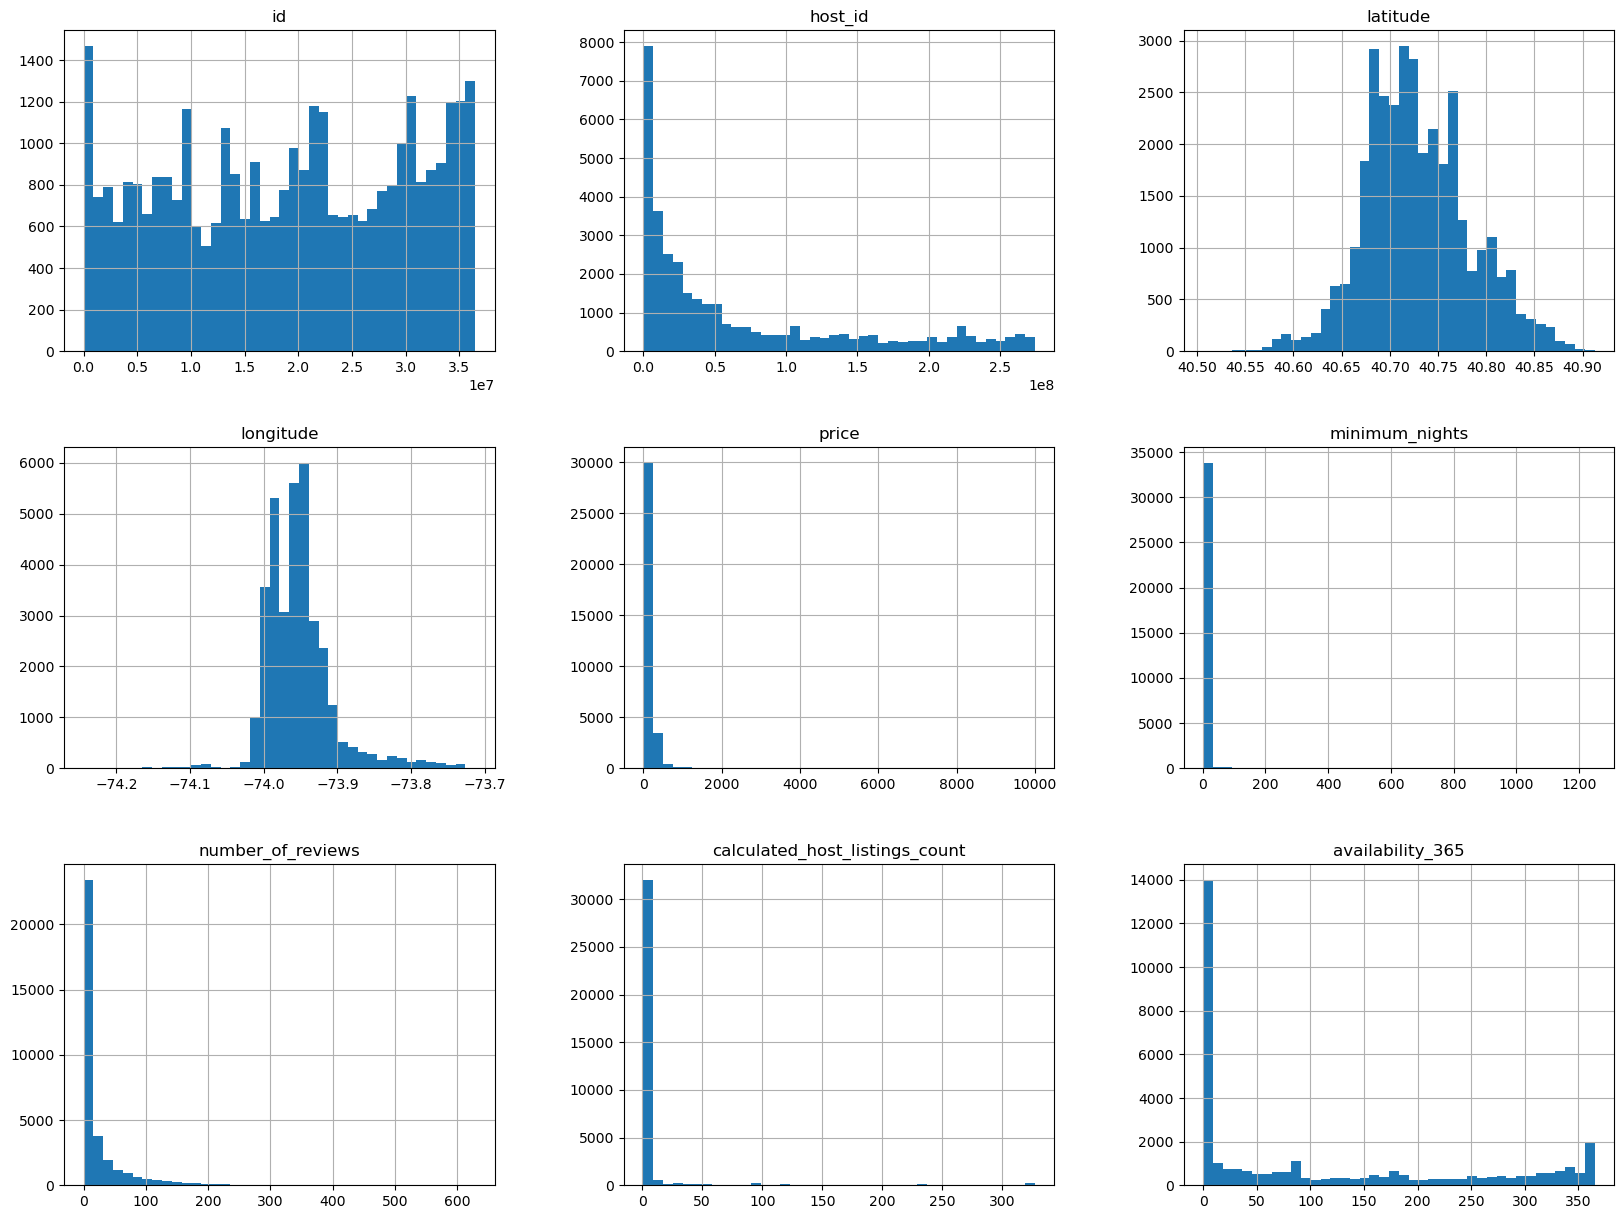

In [9]:
# Histogram of the features
X_train.hist(bins=40, figsize=(20, 15));

As explained above, excluding `id` and `host_id`. Based on the histograms for the numeric features, we can see how extremely skewed the distributions are except the `latitude` and `londitude` of the listings.

Additionally, we can also explain that there are extreme outliers almost for every feature. It is particularly more evident for features such as `price`, `minimum_nights`, `number_of_reviews`, `calculated_host_listings_count`.

Looking at the histogram for the target feature of this data set, it is evident the skewness of the distribution, which may lead to biased predictions, inefficient learning. Hence, we need to apply some scaling before training the model. This process will be done in the preprocessing section

##### EDA on calculated_host_listings_count feature

Due to the lack of documentation provided from Kraggle about this feature. I decided to further explore it. Initially, I believed it was a feature related to the host. That it was the number of listings a host has on the platform. So I used my knowledge in using `GROUP_BY`

In [10]:
hosts = X_train['host_id'].unique()
host_array = []

grouped = X_train.groupby('host_id')

for h in hosts:
    if h in grouped.groups:  
        host_array.append(grouped.get_group(h).iloc[0]['calculated_host_listings_count'])

correct = 0
for h, count in zip(hosts, host_array):  
    actual_count = grouped.get_group(h)['id'].count()
    if count == actual_count:
        correct += 1

print(correct, '/', len(hosts))

24761 / 27519


This confirms my suspicion that `calculated_host_listings_count` data is not accurate due to the split between the train and test. But it still represents the total number of listings of a host.

---

#### EDA for categorical features

For categorical features, below is a bar chart with the counts of each categorical values

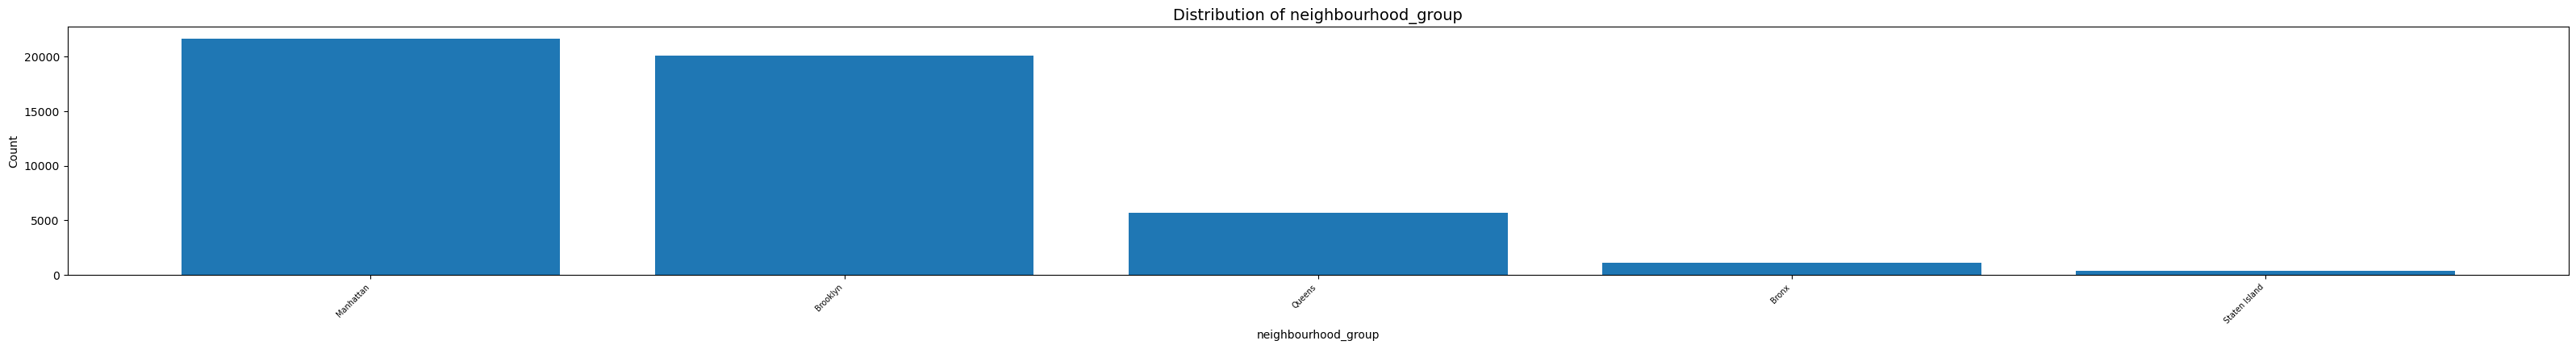

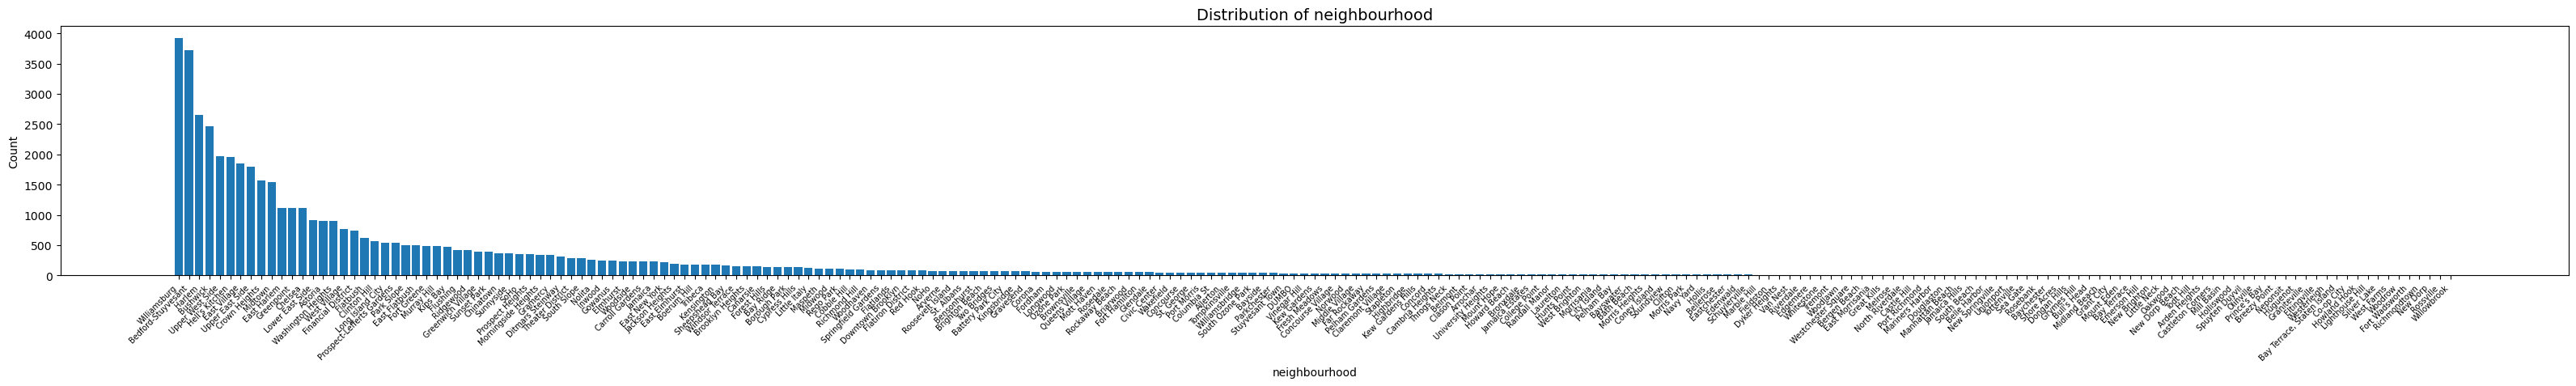

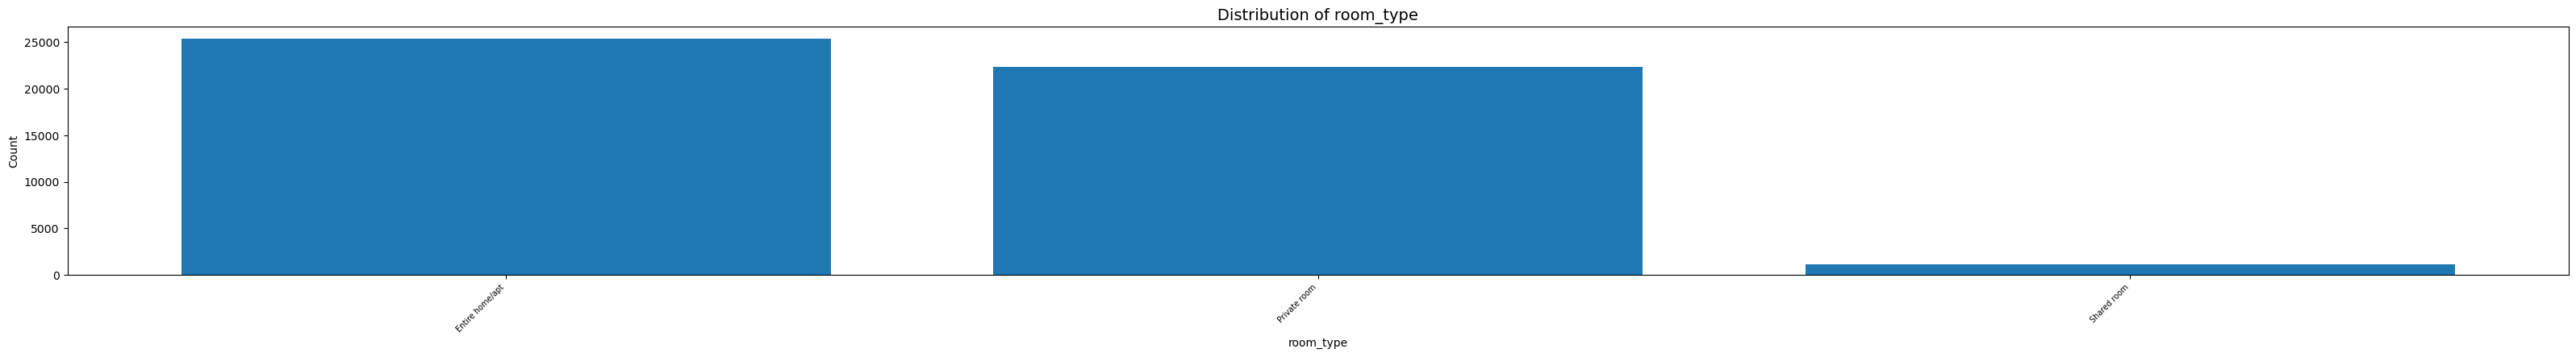

In [11]:
categorical = ['neighbourhood_group', 'neighbourhood', 'room_type']
for cat in categorical:
    plt.figure(figsize=(40, 4))
    value_counts = df[cat].value_counts()
    plt.bar(value_counts.index, value_counts.values)
    plt.xticks(rotation=45, fontsize=7, ha='right')  # Adjust fontsize here
    plt.xlabel(cat)  # Adjust x-axis label fontsize
    plt.ylabel("Count")  # Adjust y-axis label fontsize
    plt.title(f"Distribution of {cat}", fontsize=14)  # Adjust title fontsize
    plt.savefig(str(cat) + '.png', dpi=300, bbox_inches="tight")
    plt.show()

Here are some important observations that needs to be addressed:
- Skewness of all categorical distributions
    - A small number of neighbourhoods, neighbourhood_groups and room_type have a significantly higher number of listings, while most have relatively few. Which means that the listings could be mostly concentrated in a particular area and specific room type requirements. Perhaps, in desirable locations in NYC and has more ammenities and privacy


**NOTE**: For better view of the histograms/bar charts, run the cell above to download the figures as a .png

### EDA on y_train

In [12]:
y_train.info()

<class 'pandas.core.series.Series'>
Index: 34226 entries, 36150 to 15725
Series name: reviews_per_month
Non-Null Count  Dtype  
--------------  -----  
27236 non-null  float64
dtypes: float64(1)
memory usage: 534.8 KB


In [13]:
print('In y_train, there are:', y_train.isnull().sum(), 'null values')

In y_train, there are: 6990 null values


From the report above we can make the following observations:
- The target feature is of numeric type
- There are missing values, 6990 missing values to be precise

One solution to this is to drop the rows. But this will be taken care of in the preprocessing stage.

In [14]:
pd.DataFrame(y_train.describe())

,reviews_per_month
count,27236.000000
mean,1.369816
std,1.700737
min,0.010000
25%,0.190000
50%,0.710000
75%,2.000000
max,58.500000


Here are some observations:
- From the above table we can see that the max average reviews per month is 58.5, this might potentially belong to the best or potentially, worst listing since we do not have information whether the reviews are positive or negative.
- We can also detect that mean is greater than the median, which could indicate a right-skewed distribution
- There's potentially also a lot of variability due to large standard deviation

Let's plot them in a histogram to see the distribution more clearly.

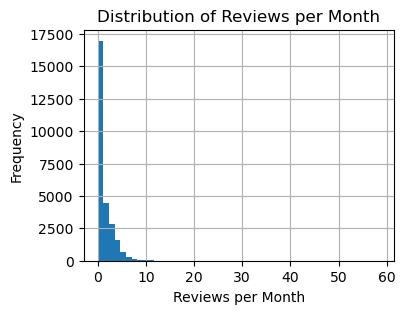

In [15]:
# Histogram of the target variable
plt.figure(figsize=(4, 3))
plt.hist(y_train, bins=50)
plt.title('Distribution of Reviews per Month')
plt.xlabel('Reviews per Month')
plt.ylabel('Frequency')
plt.grid()
plt.show()

We can observe the same skewed distribution with the target feature. 
- Most listings receive very few reviews per month, with the majority having close to 0.
- It is extremely rare for listings to have more than (approx) 10 reviews per month.
- This could suggest that there are only a few listings that are popular and often gets rented, while most remain vacant.
- However, listings with low reviews per month could be due to the increase new listings due to the increased popularity of AirBnB. Or due to the inactivity of certain listings or less desirable listings

In the preprocessing step, we might want to apply some kind of log transformation to the target feature

### Picking appropiate metric for assessment

For this regression model, I will use **$R^2$ (coefficient of determination)** as the primary evaluation metric. $R^2$ measures how well the model explains the variance in the target variable, making it a useful indicator of overall model performance for the dataset I have chosen. Also, since my dataset is balanced, $R^2$ provides a reliable measure of fit without being significatly influenced by outliers. Additionally, it allows for easy comparison between models, helping to assess improvements in predictive power

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 4. Feature engineering <a name="4"></a>
<hr>
rubric={points:1}

**Your tasks:**

1. Carry out feature engineering. In other words, extract new features relevant for the problem and work with your new feature set in the following exercises. You may have to go back and forth between feature engineering and preprocessing. 

<div class="alert alert-warning">
    
Solution_4
    
</div>

_Points:_ 1

After carefully viewing and understanding the data further. We can do feature engineering for host. Instead of having `host_id` which is unique and have no predictive power we can engineer relevant features. For example: If a host has more than, say 1 listing in NYC, it can be considered as a professional host

### 4.1: Professional host?

Now we perform the feature engineering to determine if the host is professional on both the train and test set

In [16]:
professional_train = np.zeros(X_train.shape[0])
professional_test = np.zeros(X_test.shape[0])

professional_train[X_train.iloc[:, 13] >= 2] = 1
professional_test[X_test.iloc[:, 13] >= 2] = 1

X_train['prof?'] = professional_train
X_test['prof?'] = professional_test

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,calculated_host_listings_count,availability_365,prof?
43867,33913702,Artsy apt in the heart of Brooklyn -- Near all!,27936743,Amy,Brooklyn,Bedford-Stuyvesant,40.68466,-73.94349,Entire home/apt,75,2,4,2019-06-19,1,103,0.0
26847,21293326,Huge Designer Room | Lower East Side /East Vil...,10994839,Michael,Manhattan,Lower East Side,40.71994,-73.98184,Private room,150,2,32,2019-05-26,1,76,0.0
37680,29876288,Beautiful and bright apartment close to Manhat...,5326571,Ines,Queens,Ditmars Steinway,40.77718,-73.91029,Entire home/apt,180,7,1,2019-05-25,2,122,1.0


This new feature helps the model differentiate between **individual hosts and professional hosts** who manage multiple listings. Professional hosts might have more experience or optimized pricing strategies, which could influence or give them an edge with the number of reviews their listings receive. On the other hand, individual hosts may provide **more personalized experiences**, leading to different review patterns. By including this feature, the model can capture these differences and make better predictions about how frequently a listing is reviewed.

### 4.2: Host Popularity

This line of code **calculates the average number of reviews per host** which can also mean the popularity of the hosts across all listings managed by the same host. This helps capture whether a host is generally well-reviewed, which can be useful for predicting the number of reviews a specific listing might receive

In [19]:
X_train["host_popularity"] = X_train.groupby("host_id")["number_of_reviews"].transform("mean")
X_test["host_popularity"] = X_test.groupby("host_id")["number_of_reviews"].transform("mean")

### 4.3: Host Activity (Total Listings per Host)

This feature lists the **total number of listings per host** called "host_total_listings". This feature helps determine whether a host has multiple listings, which could impact their review frequency and overall listing performance.

In [20]:
X_train["host_total_listings"] = X_train.groupby("host_id")["host_id"].transform("count")
X_test["host_total_listings"] = X_test.groupby("host_id")["host_id"].transform("count")

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 5. Preprocessing and transformations <a name="5"></a>
<hr>
rubric={points:10}

**Your tasks:**

1. Identify different feature types and the transformations you would apply on each feature type. 
2. Define a column transformer, if necessary. 

<div class="alert alert-warning">
    
Solution_5
    
</div>

_Points:_ 10

Here, I have decided to drop identifiers such as host_id and id. It is also a good idea to remove categorical features with low predictive power such as host_name, last_review and name. By dropping these features, we can decrease train and fit time during model training, while at the same time not impacting negatively on the model training process

In [23]:
numeric_feats = ['latitude', 'longitude', 'price', 'minimum_nights', 'number_of_reviews', 'availability_365', 'calculated_host_listings_count', 'host_popularity','host_total_listings']
categorical_feats = ['neighbourhood_group', 'room_type']
neighbourhood = ['neighbourhood']
drop_feats = ['id', 'host_id', 'host_name', 'last_review', 'name']
passthrough_feats = ['prof?']

In [24]:
pd.DataFrame(y_train)

,reviews_per_month
36150,NaN
45223,NaN
14316,NaN
1691,NaN
20195,0.03
...,...
7763,0.80
15377,3.66
17730,0.28
28030,1.23


Since we have many `NaN` values on our target feature we use the simple imputer to get the mean

In [25]:
imputer = SimpleImputer(strategy="mean")

y_train = imputer.fit_transform(y_train.values.reshape(-1, 1)).flatten()
y_test = imputer.transform(y_test.values.reshape(-1, 1)).flatten()

pd.DataFrame(y_train)

,0
0,1.369816
1,1.369816
2,1.369816
3,1.369816
4,0.030000
...,...
34221,0.800000
34222,3.660000
34223,0.280000
34224,1.230000


- For `numeric_feats` we only need to scale it
- For target, we need to fit in y_train, transform on both y_train and y_test
- For `categorical_feats`:
    - `OHE` for `neighbourhood_group` and `room_type` is appropiate due to the small dimension of these two features
    - `` should be used for `neighbourhood` feature due to its high dimension

In [26]:
preprocessor = make_column_transformer(    
    (StandardScaler(), numeric_feats),
    (OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1), neighbourhood),
    (OneHotEncoder(handle_unknown='ignore'), categorical_feats),
    ("passthrough", passthrough_feats),
    ("drop", drop_feats)
)
preprocessor

ColumnTransformer(transformers=[('standardscaler', StandardScaler(),
                                 ['latitude', 'longitude', 'price',
                                  'minimum_nights', 'number_of_reviews',
                                  'availability_365',
                                  'calculated_host_listings_count',
                                  'host_popularity', 'host_total_listings']),
                                ('ordinalencoder',
                                 OrdinalEncoder(handle_unknown='use_encoded_value',
                                                unknown_value=-1),
                                 ['neighbourhood']),
                                ('onehotencoder',
                                 OneHotEncoder(handle_unknown='ignore'),
                                 ['neighbourhood_group', 'room_type']),
                                ('passthrough', 'passthrough', ['prof?']),
                                ('drop', 'drop',
                                 ['id', 'host_id', 'host_name', 'last_review',
                                  'name'])])

In [27]:
X_train_transformed = preprocessor.fit_transform(X_train)
X_test_transformed = preprocessor.transform(X_test)

column_names = (
    numeric_feats
    + neighbourhood
    + passthrough_feats    
    + preprocessor.named_transformers_["onehotencoder"].get_feature_names_out().tolist()
)
column_names

X_train_transformed = pd.DataFrame(X_train_transformed, columns=column_names)
X_test_transformed = pd.DataFrame(X_test_transformed, columns=column_names)
X_train_transformed

,latitude,longitude,price,minimum_nights,number_of_reviews,availability_365,calculated_host_listings_count,host_popularity,host_total_listings,neighbourhood,prof?,neighbourhood_group_Bronx,neighbourhood_group_Brooklyn,neighbourhood_group_Manhattan,neighbourhood_group_Queens,neighbourhood_group_Staten Island,room_type_Entire home/apt,room_type_Private room,room_type_Shared room
0,1.896525,0.166302,-0.234668,-0.143631,-0.521504,-0.726886,-0.185406,-0.543961,-0.186274,204.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.590461,-0.885425,-0.006459,1.062979,-0.521504,1.670044,0.397589,-0.473756,0.350935,95.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
2,-0.329211,0.024095,0.204846,-0.282855,-0.521504,-0.856244,-0.185406,-0.543961,-0.186274,212.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.547550,-0.935425,-0.238895,-0.282855,-0.521504,-0.856244,-0.185406,-0.543961,-0.186274,95.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
4,-0.294919,0.076259,0.200620,-0.190039,-0.499068,-0.856244,-0.185406,-0.520559,-0.186274,212.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34221,-0.651235,-0.167030,-0.238895,1.062979,0.375907,1.662434,0.121433,0.155155,0.127098,13.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
34222,0.568822,-0.368327,-0.052946,-0.236447,2.439952,0.315588,-0.185406,2.545020,-0.186274,127.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
34223,1.369112,-0.078069,0.416151,-0.190039,-0.297151,-0.856244,-0.185406,-0.309947,-0.186274,94.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
34224,2.529202,2.280146,-0.471330,-0.236447,-0.140104,-0.726886,-0.185406,-0.146137,-0.186274,153.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


### Target feature transformation

If we remember, due to the skewed distribution of our target feature, we would apply a form of log transformation to make the distribution more normal-like, reduce the impact of outliers and help the model better capture patterns in the data

In [28]:
y_train = np.log(y_train)
y_test = np.log(y_test)

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 6. Baseline model <a name="6"></a>
<hr>
rubric={points:2}

**Your tasks:**
1. Try `scikit-learn`'s baseline model and report results.

<div class="alert alert-warning">
    
Solution_6
    
</div>

_Points:_ 2

In [29]:
pipe_dummy = make_pipeline(preprocessor, DummyRegressor())

In [30]:
cv_dummy = cross_validate(pipe_dummy, X_train, y_train, cv=5, return_train_score=True)
cv_dummy_score = pd.DataFrame(cv_dummy)
cv_dummy_score

,fit_time,score_time,test_score,train_score
0,0.047997,0.014007,-0.000035,0.0
1,0.048011,0.013026,-0.000192,0.0
2,0.036958,0.011032,-0.000064,0.0
3,0.037013,0.011989,-0.000167,0.0
4,0.036017,0.009968,-0.000602,0.0


In [31]:
pd.DataFrame(cv_dummy_score.mean())

,0
fit_time,0.041199
score_time,0.012004
test_score,-0.000212
train_score,0.000000


This dummy regressor score will serve as a baseline score for our more complex models below. This dummy regressor has training score of 0 and a mean validation score of approx 0 as well. This is because the `DummyRegressor` is predicting the mean

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 7. Linear models <a name="7"></a>
<hr>
rubric={points:10}

**Your tasks:**

1. Try a linear model as a first real attempt. 
2. Carry out hyperparameter tuning to explore different values for the complexity hyperparameter. 
3. Report cross-validation scores along with standard deviation. 
4. Summarize your results.

<div class="alert alert-warning">
    
Solution_7
    
</div>

_Points:_ 10

In [32]:
pipe_ridge = make_pipeline(preprocessor, Ridge())

In [33]:
cv_r = cross_validate(pipe_ridge, X_train, y_train, return_train_score=True)
cv_r_score = pd.DataFrame(cv_r)
cv_r_score

,fit_time,score_time,test_score,train_score
0,0.071993,0.015005,0.204231,0.215290
1,0.044003,0.013001,0.209852,0.213903
2,0.047001,0.014002,0.215591,0.212487
3,0.044003,0.012998,0.214905,0.212577
4,0.044988,0.013993,0.215802,0.212348


In [34]:
pd.DataFrame(cv_r_score.mean())

,0
fit_time,0.050397
score_time,0.013800
test_score,0.212076
train_score,0.213321


Here the test score seems more acceptable than the baseline model coming at approximately 45%. Let's carry out hyperparameter tuning using `GridSearch` for $\alpha$ which regulates the bias-variance tradeoff

In [105]:
param_grid = {
    "ridge__alpha": [0.001, 0.01, 0.1, 1, 10, 100, 1000]
}
gs = GridSearchCV(pipe_ridge, param_grid = param_grid, n_jobs=-1, return_train_score=True)
gs.fit(X_train, y_train)
results = pd.DataFrame(gs.cv_results_)

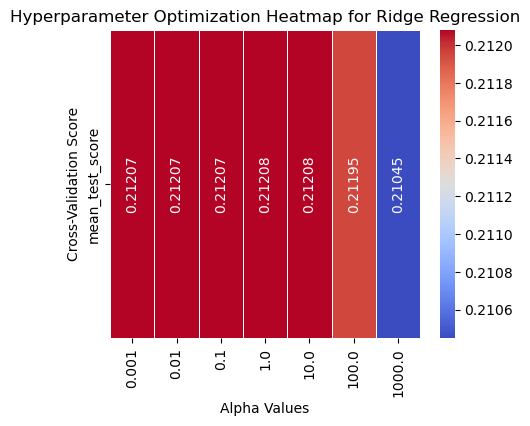

In [36]:
plt.figure(figsize=(5, 4))
sns.heatmap(results[['param_ridge__alpha', 'mean_test_score']].set_index('param_ridge__alpha').T,
            annot=True, cmap="coolwarm", fmt=".5f", linewidths=0.5, annot_kws={"rotation": 90})

plt.xlabel("Alpha Values")
plt.ylabel("Cross-Validation Score")
plt.title("Hyperparameter Optimization Heatmap for Ridge Regression")
plt.show()

By looking at this heatmap, there's no further need to explore other values of alpha since the improvements are negligible. Below is a table with all the individual alpha values and its average validation and standard deviation scores

In [104]:
results_summary = results[["param_ridge__alpha", "mean_test_score", "std_test_score"]]
pd.DataFrame(results_summary)

,param_ridge__alpha,mean_test_score,std_test_score
0,0.001,0.212075,0.004490
1,0.010,0.212075,0.004490
2,0.100,0.212075,0.004490
3,1.000,0.212076,0.004489
4,10.000,0.212079,0.004477
5,100.000,0.211950,0.004408
6,1000.000,0.210450,0.004292


After hyperparameter optimization, the mean test scores remain nearly identical across different alpha values, ranging from 0.210450 to 0.212076. The standard deviation is also stable, staying around 0.0044, which indicates low variance across cross-validation folds. Since there is no significant improvement across different alpha values, Ridge regression's regularization strength does not have a strong impact on performance. This suggests that feature selection or a different modeling approach may be more effective in improving results rather than fine-tuning alpha.

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 8. Different models <a name="8"></a>
<hr>
rubric={points:12}

**Your tasks:**
1. Try at least 3 other models aside from a linear model. One of these models should be a tree-based ensemble model. 
2. Summarize your results in terms of overfitting/underfitting and fit and score times. Can you beat a linear model? 

<div class="alert alert-warning">
    
Solution_8
    
</div>

_Points:_ 12

_Type your answer here, replacing this text._

In [40]:
pipe_rf = make_pipeline(preprocessor, RandomForestRegressor(random_state=123))

pipe_lgbm = make_pipeline(preprocessor, LGBMRegressor(random_state=123))

pipe_dtr = make_pipeline(preprocessor, DecisionTreeRegressor(random_state=123))

regressors = {
    "dummy": pipe_dummy,
    "ridge": pipe_ridge,
    "random forest": pipe_rf,
    "LightGBM": pipe_lgbm,
    "decision tree": pipe_dtr
}

In [41]:
summary_results = {}

for name, model in regressors.items():
    cv_result = cross_validate(model, X_train, y_train, cv=3, return_train_score=True)
    
    summary_results[name] = {
        "fit_time": np.mean(cv_result["fit_time"]),
        "score_time": np.mean(cv_result["score_time"]),
        "mean_test_score": np.mean(cv_result["test_score"]),
        "std_test_score": np.std(cv_result["test_score"]),
        "mean_train_score": np.mean(cv_result["train_score"]),
        "std_train_score": np.std(cv_result["train_score"])
    }
df_summary = pd.DataFrame(summary_results).T

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000820 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1881
[LightGBM] [Info] Number of data points in the train set: 22817, number of used features: 19
[LightGBM] [Info] Start training from score -0.372740


C:\Users\menge\miniforge3\envs\cpsc330\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
C:\Users\menge\miniforge3\envs\cpsc330\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000761 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1874
[LightGBM] [Info] Number of data points in the train set: 22817, number of used features: 19
[LightGBM] [Info] Start training from score -0.366071


C:\Users\menge\miniforge3\envs\cpsc330\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
C:\Users\menge\miniforge3\envs\cpsc330\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000745 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1877
[LightGBM] [Info] Number of data points in the train set: 22818, number of used features: 19
[LightGBM] [Info] Start training from score -0.363162


C:\Users\menge\miniforge3\envs\cpsc330\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
C:\Users\menge\miniforge3\envs\cpsc330\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


In [42]:
df_summary

,fit_time,score_time,mean_test_score,std_test_score,mean_train_score,std_train_score
dummy,0.037667,0.014341,-0.000075,0.000053,0.000000,0.000000
ridge,0.039659,0.017450,0.211832,0.003500,0.213477,0.001673
random forest,13.603892,0.244694,0.715917,0.004937,0.960044,0.000204
LightGBM,0.201994,0.030926,0.731180,0.004660,0.773571,0.002435
decision tree,0.269854,0.019425,0.454598,0.004337,1.000000,0.000000


Looking at the results, LightGBM has emerged as the best-performing model, achieving the highest test score while not overfitting. Ridge regression provided a well-balanced alternative with minimal overfitting but lower accuracy. Random Forest and Decision Tree exhibited significant overfitting, close to 1, with large discrepancies between training and test scores, making them less ideal for generalization. In terms of efficiency, Ridge and LightGBM were the fastest models, making them practical choices for large-scale applications. Random Forest, on the other hand, had the highest computational cost of 17.

Overall, LightGBM outperformed Ridge by delivering better accuracy while keeping overfitting in check, making it the preferred choice. Ridge remains a good alternative when speed is the primary concern, whereas Decision Trees and Random Forest should be avoided since overfitting is an issue. Further improvements could be explored by tuning LightGBM’s hyperparameters or visualizing the results for deeper insights.

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 9. Feature selection <a name="9"></a>
<hr>
rubric={points:2}

**Your tasks:**

Make some attempts to select relevant features. You may try `RFECV` or forward selection for this. Do the results improve with feature selection? Summarize your results. If you see improvements in the results, keep feature selection in your pipeline. If not, you may abandon it in the next exercises. 

<div class="alert alert-warning">
    
Solution_9
    
</div>

_Points:_ 2

_Type your answer here, replacing this text._

In [43]:
pipe_dummy_with_rfecv = make_pipeline(preprocessor, RFECV(DecisionTreeRegressor(), cv=3, n_jobs=-1), DummyRegressor())

pipe_ridge_with_rfecv = make_pipeline(preprocessor, RFECV(DecisionTreeRegressor(), cv=3, n_jobs=-1), Ridge())

pipe_rf_with_rfecv = make_pipeline(preprocessor, RFECV(DecisionTreeRegressor(), cv=3, n_jobs=-1), RandomForestRegressor(random_state=123))

pipe_lgbm_with_rfecv = make_pipeline(preprocessor, RFECV(DecisionTreeRegressor(), cv=3, n_jobs=-1), LGBMRegressor(random_state=123))

pipe_dtr_with_rfecv = make_pipeline(preprocessor, RFECV(DecisionTreeRegressor(), cv=3, n_jobs=-1), DecisionTreeRegressor(random_state=123))

regressors_with_rfecv = {
    "dummy": pipe_dummy_with_rfecv,
    "ridge": pipe_ridge_with_rfecv,
    "random forest": pipe_rf_with_rfecv,
    "LightGBM": pipe_lgbm_with_rfecv,
    "decision tree": pipe_dtr_with_rfecv
}

In [44]:
REFCV_results = {}

for name, model in regressors_with_rfecv.items():
    model.fit(X_train, y_train)
    REFCV_results[name] = model

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000167 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 34226, number of used features: 1
[LightGBM] [Info] Start training from score -0.367324


In [45]:
rfecv_summary = {}
rfecv_scores = {}

for name, model in REFCV_results.items():
    selector = model.named_steps['rfecv']  # Extract RFECV step

    rfecv_scores[name] = {
        "mean_test_score": np.mean(selector.cv_results_["mean_test_score"]),
        "std_test_score": np.mean(selector.cv_results_["std_test_score"]),
    }
    
    rfecv_summary[name] = {
        "Optimal Features": selector.n_features_,
    }

# Convert to DataFrame (excluding Support Mask since it's an array)
df_rfecv = pd.DataFrame(rfecv_summary).T
df_rfecv_scores = pd.DataFrame(rfecv_scores)
df_rfecv

,Optimal Features
dummy,1
ridge,1
random forest,1
LightGBM,1
decision tree,1


This RFECV output suggests that all models, including Dummy, Ridge, Random Forest, LightGBM, and Decision Tree, are selecting only 1 optimal feature for predicting reviews per month. This is not good since RFECV has eliminated all 18 features but one. So we should not trust this so much since it oversimplifies the model and likely reduces predictive power

In [46]:
df_rfecv_scores

,dummy,ridge,random forest,LightGBM,decision tree
mean_test_score,0.442303,0.440696,0.441253,0.441767,0.441956
std_test_score,0.005244,0.005664,0.006056,0.005229,0.005371


In [47]:
df_summary[["mean_test_score", "std_test_score"]].T

,dummy,ridge,random forest,LightGBM,decision tree
mean_test_score,-0.000075,0.211832,0.715917,0.73118,0.454598
std_test_score,0.000053,0.003500,0.004937,0.00466,0.004337


The first table represents the **RFECV scores**, and the second table shows the scores **without RFECV**, it shows that RFECV actually hurt performance. Before feature elimination, Random Forest and LightGBM performed well, with scores above 0.71, but after RFECV, they dropped to around 0.44, meaning important features were removed. Ridge Regression also suffered, showing that eliminating features made the model worse instead of better. As I suspected, since RFECV selected only **one feature**, it oversimplified the problem, leading to worse predictions across all models

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 10. Hyperparameter optimization <a name="10"></a>
<hr>
rubric={points:10}

**Your tasks:**

Make some attempts to optimize hyperparameters for the models you've tried and summarize your results. In at least one case you should be optimizing multiple hyperparameters for a single model. You may use `sklearn`'s methods for hyperparameter optimization or fancier Bayesian optimization methods. 
  - [GridSearchCV](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html)   
  - [RandomizedSearchCV](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html)
  - [scikit-optimize](https://github.com/scikit-optimize/scikit-optimize) 

<div class="alert alert-warning">
    
Solution_10
    
</div>

_Points:_ 10

In [48]:
param_random_lightGB = {
    "lgbmregressor__n_estimators": np.arange(100, 600, 50),  # Number of boosting rounds
    "lgbmregressor__learning_rate": np.logspace(-3, -1, 5), # Step size 
    "lgbmregressor__max_depth": np.arange(3, 10, 2), # Tree depth 
    "lgbmregressor__num_leaves": np.arange(10, 50, 10)  # Number of leaves
}

rs_lightGBM = RandomizedSearchCV(pipe_lgbm, param_random_lightGB,  n_iter=20, cv=4, n_jobs=-1, random_state=123)
rs_lightGBM.fit(X_train, y_train)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000798 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1899
[LightGBM] [Info] Number of data points in the train set: 34226, number of used features: 19
[LightGBM] [Info] Start training from score -0.367324
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain

RandomizedSearchCV(cv=4,
                   estimator=Pipeline(steps=[('columntransformer',
                                              ColumnTransformer(transformers=[('standardscaler',
                                                                               StandardScaler(),
                                                                               ['latitude',
                                                                                'longitude',
                                                                                'price',
                                                                                'minimum_nights',
                                                                                'number_of_reviews',
                                                                                'availability_365',
                                                                                'calculated_host_listings_count',
                                                                                'host_popularity',
                                                                                'host_total_listings']),
                                                                              ('ordinalencoder',
                                                                               OrdinalEncoder(handle_unknown='...
                                             ('lgbmregressor',
                                              LGBMRegressor(random_state=123))]),
                   n_iter=20, n_jobs=-1,
                   param_distributions={'lgbmregressor__learning_rate': array([0.001     , 0.00316228, 0.01      , 0.03162278, 0.1       ]),
                                        'lgbmregressor__max_depth': array([3, 5, 7, 9]),
                                        'lgbmregressor__n_estimators': array([100, 150, 200, 250, 300, 350, 400, 450, 500, 550]),
                                        'lgbmregressor__num_leaves': array([10, 20, 30, 40])},
                   random_state=123)

Due to the only hyper parameter of `Ridge()` model being $\alpha$ we can use `GridSearch()`. This method guarantees the absolute best parameter values by exhaustively searching for the best $\alpha$

In [49]:
# Get the best score and hyperparameter values
rs_lightGBM.best_score_, rs_lightGBM.best_params_

(0.7338293309005423,
 {'lgbmregressor__num_leaves': 40,
  'lgbmregressor__n_estimators': 400,
  'lgbmregressor__max_depth': 9,
  'lgbmregressor__learning_rate': 0.1})

Here can do not see any significant improvements after optimizing the hyperparameters for LightGBM

In [102]:
param_random_rf = {
    "randomforestregressor__n_estimators": np.arange(100, 600, 50),  # Number of trees
    "randomforestregressor__max_depth": np.arange(3, 20, 2),  # Tree depth
}

rs_rf = RandomizedSearchCV(pipe_rf, param_random_rf,  n_iter=20, cv=3, n_jobs=-1, random_state=123)
rs_rf.fit(X_train, y_train)

RandomizedSearchCV(cv=3,
                   estimator=Pipeline(steps=[('columntransformer',
                                              ColumnTransformer(transformers=[('standardscaler',
                                                                               StandardScaler(),
                                                                               ['latitude',
                                                                                'longitude',
                                                                                'price',
                                                                                'minimum_nights',
                                                                                'number_of_reviews',
                                                                                'availability_365',
                                                                                'calculated_host_listings_count',
                                                                                'host_popularity',
                                                                                'host_total_listings']),
                                                                              ('ordinalencoder',
                                                                               OrdinalEncoder(handle_unknown='...
                                                                              ('drop',
                                                                               'drop',
                                                                               ['id',
                                                                                'host_id',
                                                                                'host_name',
                                                                                'last_review',
                                                                                'name'])])),
                                             ('randomforestregressor',
                                              RandomForestRegressor(random_state=123))]),
                   n_iter=20, n_jobs=-1,
                   param_distributions={'randomforestregressor__max_depth': array([ 3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'randomforestregressor__n_estimators': array([100, 150, 200, 250, 300, 350, 400, 450, 500, 550])},
                   random_state=123)

In [103]:
rs_rf.best_score_, rs_rf.best_params_

(0.7218352463572227,
 {'randomforestregressor__n_estimators': 550,
  'randomforestregressor__max_depth': 15})

In [52]:
param_random_dtr = {
    "decisiontreeregressor__max_depth": np.arange(3, 30, 2),  # Tree depth
    "decisiontreeregressor__min_samples_split": [2, 5, 10, 20],  # Minimum samples to split a node
    "decisiontreeregressor__min_samples_leaf": [1, 2, 5, 10],  # Minimum samples per leaf
}

rs_dtr = RandomizedSearchCV(pipe_dtr, param_random_dtr, n_iter=20, cv=3, n_jobs=-1, random_state=123)
rs_dtr.fit(X_train, y_train)

RandomizedSearchCV(cv=3,
                   estimator=Pipeline(steps=[('columntransformer',
                                              ColumnTransformer(transformers=[('standardscaler',
                                                                               StandardScaler(),
                                                                               ['latitude',
                                                                                'longitude',
                                                                                'price',
                                                                                'minimum_nights',
                                                                                'number_of_reviews',
                                                                                'availability_365',
                                                                                'calculated_host_listings_count',
                                                                                'host_popularity',
                                                                                'host_total_listings']),
                                                                              ('ordinalencoder',
                                                                               OrdinalEncoder(handle_unknown='...
                                                                                'host_name',
                                                                                'last_review',
                                                                                'name'])])),
                                             ('decisiontreeregressor',
                                              DecisionTreeRegressor(random_state=123))]),
                   n_iter=20, n_jobs=-1,
                   param_distributions={'decisiontreeregressor__max_depth': array([ 3,  5,  7,  9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29]),
                                        'decisiontreeregressor__min_samples_leaf': [1,
                                                                                    2,
                                                                                    5,
                                                                                    10],
                                        'decisiontreeregressor__min_samples_split': [2,
                                                                                     5,
                                                                                     10,
                                                                                     20]},
                   random_state=123)

In [53]:
rs_dtr.best_score_, rs_dtr.best_params_

(0.6871074946571986,
 {'decisiontreeregressor__min_samples_split': 10,
  'decisiontreeregressor__min_samples_leaf': 5,
  'decisiontreeregressor__max_depth': 7})

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 11. Interpretation and feature importances <a name="1"></a>
<hr>
rubric={points:10}

**Your tasks:**

1. Use the methods we saw in class (e.g., `shap`) (or any other methods of your choice) to examine the most important features of one of the non-linear models. 
2. Summarize your observations. 

<div class="alert alert-warning">
    
Solution_11
    
</div>

_Points:_ 10

We will examine LightGBM using SHAP since it is currently our best socoring model

In [54]:
# load JS visualization code to notebook
shap.initjs()

In [55]:
X_train_enc = pd.DataFrame(
    data=preprocessor.transform(X_train),
    columns=column_names,
    index=X_train.index,
)

X_test_enc = pd.DataFrame(
    data=preprocessor.transform(X_test),
    columns=column_names,
    index=X_test.index,
)

model = pipe_lgbm.named_steps['lgbmregressor']
model.fit(X_train_enc, y_train)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000960 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1899
[LightGBM] [Info] Number of data points in the train set: 34226, number of used features: 19
[LightGBM] [Info] Start training from score -0.367324


LGBMRegressor(random_state=123)

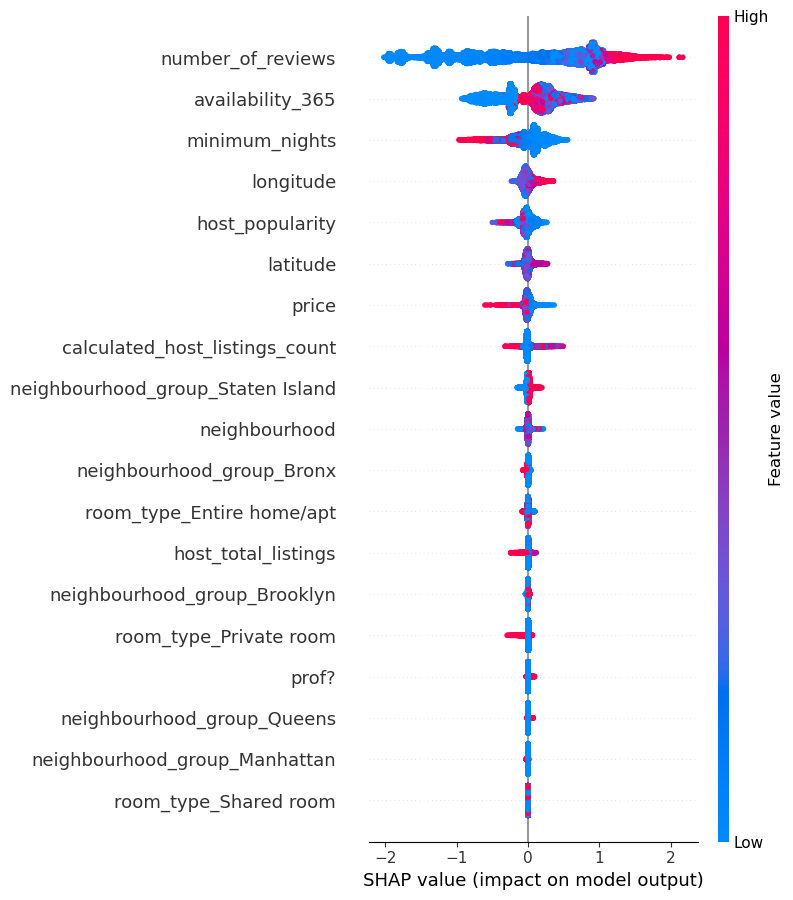

In [56]:
explainer = shap.Explainer(model)

train_shap_values = explainer(X_train_enc) # train shap values
test_shap_values = explainer(X_test_enc) # test shap values 

shap.summary_plot(train_shap_values, X_train_enc)

The SHAP summary plot provides a clear understanding of how different features influence the model’s predictions by combining SHAP values (impact) and feature values (actual input values). For example, in the case of number_of_reviews, higher values (red) generally correspond to positive SHAP values, meaning that listings with more reviews tend to increase the predicted outcome. Conversely, lower values (blue) are mostly associated with negative SHAP values, indicating that listings with few reviews lower the prediction. Similarly, for minimum_nights, some high values (red) push predictions lower, suggesting that listings requiring longer stays may negatively impact the target variable. By analyzing both SHAP values and feature values, we can see not only which features are important but also how their different values affect the model's decision-making**, providing deeper insights into the factors driving predictions.

NOTE: minimum_nights might look weird compared to other features but it makes sense since if a listing allows short stays it can accommodate many different guests in a month. Since more guests translates to  higher chances of getting reviews, we get Positive SHAP values (higher predictions for reviews per month).

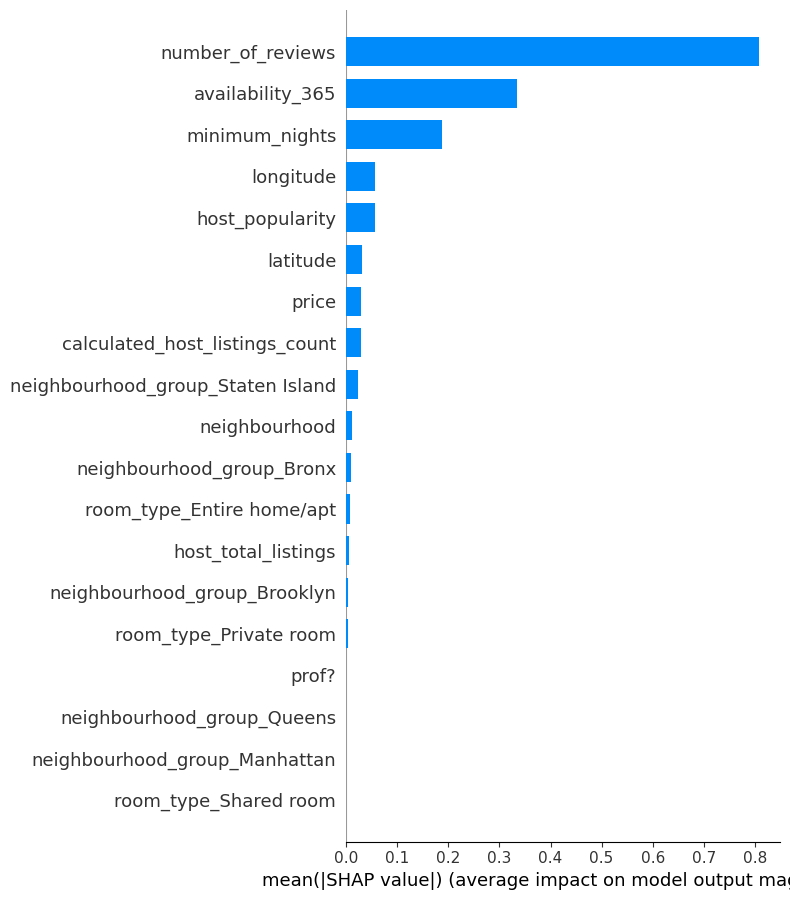

In [57]:
shap.summary_plot(train_shap_values, X_train_enc, plot_type="bar")

Above is another SHAP chart shows the **average impact of each feature** on the model’s predictions for **reviews per month**. The **x-axis** represents the **mean absolute SHAP value**, which measures how much each feature influences the prediction. Features with longer bars have a **greater impact** on the model’s output, while those with shorter bars contribute less. Like the summary SHAP plot above, the **number of past reviews** is the most influential factor, meaning listings with more reviews tend to get significantly different predictions. **Availability (availability_365)** and **minimum stay requirements (minimum_nights)** also play important roles, suggesting that how often a listing is available and how long guests are required to stay can strongly affect review frequency. Other factors, such as **location (longitude, neighborhood group) and host popularity**, have a smaller but still notable influence. Features at the bottom, like **room type and borough differences**, have very little impact on predictions. This chart helps identify which factors the model relies on the most when determining how many reviews a listing is expected to receive.

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 12. Results on the test set <a name="12"></a>
<hr>

rubric={points:10}

**Your tasks:**

1. Try your best performing model on the test data and report test scores. 
2. Do the test scores agree with the validation scores from before? To what extent do you trust your results? Do you think you've had issues with optimization bias? 
3. Take one or two test predictions and explain these individual predictions (e.g., with SHAP force plots).  

<div class="alert alert-warning">
    
Solution_12
    
</div>

_Points:_ 10

In [64]:
rs_lightGBM.score(X_test, y_test)

C:\Users\menge\miniforge3\envs\cpsc330\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


0.7342141495146135

The fact that the test scores are almost the same as the validation scores means the model is performing consistently on new data, which is a good sign. It suggests that the validation set did a good job of representing the test data, so the model isn’t just overfitting or memorizing patterns but actually learning something useful. Since the results are stable, **optimization bias** where the model is tuned too much to the validation data is probably not a big issue. However, it’s still important to make sure the dataset truly represents real-world scenarios. If the test and validation sets come from very similar data, the results might look better than they actually are when applied to new situations. Overall, the model seems reliable, but it’s always good to test on fresh, unseen data to be sure.

In [100]:
ex1_idx = 10
ex2_idx = 68

shap.force_plot(explainer.expected_value, test_shap_values.values[ex1_idx, :], X_test_enc.iloc[ex1_idx, :])

This plot explains how different features influenced the model’s prediction for a specific listing. The base value is the the model’s average prediction, it starts near -0.3673, and the final prediction for this instance is -1.42

- Features that increase the predicted number of reviews per month are shown in blue which pushes the value up. Here, "number_of_reviews" (-0.4991) and "minimum_nights" (0.3669) had a positive impact, suggesting that listings with more existing reviews and slightly longer minimum stays tend to get more reviews per month.
- Features that decrease the prediction are shown in red (pushing the value down). Here, "price" (-0.391), "calculated_host_listings_count" (-0.124), and "availability_365" (1.678) reduced the predicted review count. This suggests that a higher price, a larger number of listings managed by the host, and more availability throughout the year may be linked to fewer reviews per month.

In [101]:
shap.force_plot(explainer.expected_value, test_shap_values.values[ex2_idx, :], X_test_enc.iloc[ex2_idx, :])

For this particular instance:
- Features pushing the prediction higher (blue) are:
    - "number_of_reviews" (-0.4991) increased the predicted number of reviews per month. This means that having more existing reviews is a strong indicator that the listing will continue to receive more reviews.

- Features pushing the prediction lower (red):
    - "availability_365" (-0.8182) had the strongest negative impact, suggesting that listings with high availability tend to get fewer reviews per month. This could mean that more availability does not necessarily lead to more bookings and reviews.
    - "longitude" (0.6611), "minimum_nights" (-0.19), and "entire home/apt" also slightly pushed the prediction lower. This might indicate that certain locations, longer minimum stays, and entire home listings receive fewer reviews compared to private or shared rooms.

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 13. Summary of results <a name="13"></a>
<hr>
rubric={points:12}

Imagine that you want to present the summary of these results to your boss and co-workers. 

**Your tasks:**

1. Create a table summarizing important results. 
2. Write concluding remarks.
3. Discuss other ideas that you did not try but could potentially improve the performance/interpretability . 
3. Report your final test score along with the metric you used at the top of this notebook in the [Submission instructions section](#si).

<div class="alert alert-warning">
    
Solution_13
    
</div>

_Points:_ 12

## 13.1. Table summary

Since our best model is LigthGBM, here's table with the results of this project:

|Metric|Score|
|------|-----|
|Train $R^2$ of LightGBM without hyperparameter optimization| 0.77 |
|Validation $R^2$ of LightGBM without hyperparameter optimization| 0.73 |
|Validation $R^2$ of LightGBM **with** hyperparameter optimization| 0.73 |
|Test $R^2$ of lightGBM **with** hyperparameter optimization | 0.73 |

With the most important features (determined by SHAP): **being number_of_reviews, availability_365, minimum_nights, longitude, latitude and host_popularity**

## 13.2 Concluding remarks

The LightGBM model performed consistently across validation and test sets, achieving an $R^2$ of 0.73. This indicates that the model captures meaningful patterns but still leaves 27% of the variance unexplained. The most influential features were number of reviews, listing availability, minimum nights, and location-related attributes. These factors impact strongly the number of reviews per month, showing that well-reviewed, frequently booked, and strategically located listings tend to receive more reviews

## 13.3 Ideas for further improvement

To enhance model performance, we could explore the following approaches:
- Feature engineering: We could add more features such as response rate from the hosts, the year of when the listing first appeared on AirBnb and sentiment analysis of reviews could provide more predictive power
- Handling missing values differently: Instead of mean imputation, we could use different strategy to impute the NaN values in the target feature or we could also remove them if they somehow does not exhibit any significant pattern that our training models can learn from

## 13.4 Final test score

The final test score for the Ridge Regression model is:

$$R^2=0.73$$

This means the model explains 73% of the variance in the number of reviews per month.

<!-- END QUESTION -->

<br><br>

<br><br>

<!-- BEGIN QUESTION -->

## 14. Your takeaway <a name="15"></a>
<hr>
rubric={points:2}

**Your tasks:**

What is your biggest takeaway from the supervised machine learning material we have learned so far? Please write thoughtful answers.  

<div class="alert alert-warning">
    
Solution_14
    
</div>

_Points:_ 2

I believe this has been one of the most interesting projects I have done for a course. I believe it has reinforced my knowledge learned from this course. I believe it would also be beneficial if we did this type of HW again for the last HW, so that we can apply even more ML techniques

<!-- END QUESTION -->

<br><br>

**PLEASE READ BEFORE YOU SUBMIT:** 

When you are ready to submit your assignment do the following:

1. Run all cells in your notebook to make sure there are no errors by doing `Kernel -> Restart Kernel and Clear All Outputs` and then `Run -> Run All Cells`. 
2. Notebooks with cell execution numbers out of order or not starting from "1" will have marks deducted. Notebooks without the output displayed may not be graded at all (because we need to see the output in order to grade your work).
4. Upload the assignment using Gradescope's drag and drop tool. Check out this [Gradescope Student Guide](https://lthub.ubc.ca/guides/gradescope-student-guide/) if you need help with Gradescope submission. 
5. Make sure that the plots and output are rendered properly in your submitted file. If the .ipynb file is too big and doesn't render on Gradescope, also upload a pdf or html in addition to the .ipynb so that the TAs can view your submission on Gradescope. 

This was a tricky one but you did it! 

![](img/eva-well-done.png)